## 1. 라이브러리 및 파일 합치기

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cuml.ensemble import RandomForestRegressor as cumlRF
# 현재 작업 디렉터리 출력
current_directory = os.getcwd()
print("현재 작업 디렉터리:", current_directory)
# 종관기상관측 폴더 경로 설정
asos_folder_path = os.path.join('data', '종관기상관측(ASOS)기상데이터')
print("asos디렉터리:", asos_folder_path)
processed_folder_path = os.path.join(asos_folder_path, '가공후')
# 폴더 내 파일 리스트 가져오기
asos_files = os.listdir(asos_folder_path)
print(asos_files)
generation_folder_path = os.path.join('data', '한국전력거래소_지역별 시간별 태양광 및 풍력 발전량', '가공후')

현재 작업 디렉터리: /home/kdh/Renewable-Energy-Generation-Projection
asos디렉터리: data/종관기상관측(ASOS)기상데이터
['2001_2412OBS_ASOS_DD.csv', '가공후', '1001_1912OBS_ASOS_DD.csv']


### 1-1 데이터 확인

In [ ]:
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def imfomation_asos_data(dirPath):
    '''
    폴더 경로를 입력받아 폴더 내 모든 파일을 읽어오고, 각 파일의 데이터 기본 정보를 출력하는 함수
    '''
    # 데이터 파일 경로
    files = os.listdir(dirPath)
    print("파일 목록", files)
    for file in files:
        file_path = os.path.join(dirPath, file)
        print(file_path)
        # current_directory = os.getcwd()
        # full_file_path = os.path.join(current_directory, file_path)
        # 데이터 읽기   
        print("데이터를 읽는 중...")    
        df = pd.read_csv(file_path, encoding='cp949', low_memory=False)
        # 데이터 기본 정보 출력
        print(f"\n======= {file} =======")
        print(f"\n=== 데이터 기본 정보 ===")
        # print("데이터 크기:", df.shape)
        print("\n컬럼 목록:")
        print(df.columns.tolist())
        print("\n처음 5개 행:")
        print(df.head())
        print("\n데이터 타입:")
        print(df.dtypes)
    
        # 결측치 확인
        print("\n=== 결측치 현황 ===")
        missing_values = df.isnull().sum()
        missing_percentages = (missing_values / len(df)) * 100
        print(missing_percentages)

imfomation_asos_data(asos_folder_path)

파일 목록 ['1001_1912OBS_ASOS_DD.csv', '2001_2412OBS_ASOS_DD.csv', '가공후']
data\종관기상관측(ASOS)기상데이터\1001_1912OBS_ASOS_DD.csv
데이터를 읽는 중...


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6752\2986967807.py:20: DtypeWarning: Columns (60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='cp949')



======= 1001_1912OBS_ASOS_DD.csv =======

=== 데이터 기본 정보 ===

컬럼 목록:
['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)', '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)', '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)', '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)', '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온도(°C)', '5.0m 지중온도(°C)', '합계

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6752\2986967807.py:20: DtypeWarning: Columns (60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='cp949')



======= 2001_2412OBS_ASOS_DD.csv =======

=== 데이터 기본 정보 ===

컬럼 목록:
['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)', '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)', '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)', '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)', '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온도(°C)', '5.0m 지중온도(°C)', '합계

PermissionError: [Errno 13] Permission denied: 'data\\종관기상관측(ASOS)기상데이터\\가공후'

### 1-2. 파일 합치기

In [ ]:
asos_files = os.listdir(asos_folder_path)
dfs = []
sum = 0
for file in asos_files:
    df = pd.read_csv(os.path.join(asos_folder_path, file), encoding='cp949')
    dfs.append(df)
    sum += df.shape[0]
    print(f"{file}: ", df.shape)

df = pd.concat(dfs)
print(df.shape)
output_file = os.path.join(asos_folder_path, 'ASOS_통합.csv')
print(f"\n데이터를 {output_file}에 저장하는 중...")
df.to_csv(output_file, index=False, encoding='cp949')


## 2. 결측치

### 2-1 일사량 데이터의 결측률이 5% 이상일 때 제거

In [5]:
import pandas as pd
import os

# CSV 파일 경로 설정
file_path = os.path.join(os.path.join(asos_folder_path, '가공후'), 'ASOS_통합(1301~2412).csv')

# 지역 컬럼
location_column = '지점명'

# 일사량 관련 컬럼
col_hhmi = '1시간 최다일사 시각(hhmi)'        # Hour of maximum insolation
col_max = '1시간 최다일사량(MJ/m2)'          # Max insolation per hour
col_sum = '합계 일사량(MJ/m2)'               # Total insolation

# 날짜 컬럼 (연월일 컬럼 명 확인 필요, 가정: '일시')
date_column = '일시'

# 지역별 전체 건수 및 결측치 건수 기록용 dict
solar_stats = {}

# 데이터 청크 단위로 읽기
for chunk in pd.read_csv(file_path, encoding='cp949', chunksize=10000):
    # 날짜 형식으로 변환
    chunk[date_column] = pd.to_datetime(chunk[date_column], errors='coerce')
    
    # 2020-01-01 ~ 2024-12-31 범위로 필터링
    # chunk = chunk[
    #     (chunk[date_column] >= '2014-01-01') &
    #     (chunk[date_column] <= '2024-12-31')
    # ]
    
    # 필요한 컬럼만 추출
    chunk = chunk[[location_column, col_hhmi, col_max, col_sum]]
    
    # 그룹별 전체 행 수
    total = chunk.groupby(location_column).size()
    
    # 그룹별 결측치 수 계산
    missing = chunk.groupby(location_column)[[col_hhmi, col_max, col_sum]].apply(lambda df: df.isna().sum())
    
    for region in total.index:
        # 초기화
        if region not in solar_stats:
            solar_stats[region] = {
                'total': 0, 'missing': [0, 0, 0]
            }
        
        # 누적 전체 행 수
        solar_stats[region]['total'] += total[region]
        
        # 누적 결측치 수
        solar_stats[region]['missing'][0] += missing.loc[region, col_hhmi]
        solar_stats[region]['missing'][1] += missing.loc[region, col_max]
        solar_stats[region]['missing'][2] += missing.loc[region, col_sum]

# 최종 결측률 계산 후 20% 이상인 지역 찾기
excluded_regions = []

for region, stats in solar_stats.items():
    total_rows = stats['total']
    missing_counts = stats['missing']
    
    # 각 컬럼의 결측률 계산
    missing_ratios = [count / total_rows for count in missing_counts]
    
    # 3개 중 하나라도 20% 이상이면 제외 대상
    if any(ratio >= 0.05 for ratio in missing_ratios):
        excluded_regions.append(region)

# 결과 출력
print("❌ 삭제할 지역 목록 (결측률 ≥ 5%):", excluded_regions)
print(f"삭제 지역 수: {len(excluded_regions)} / 총 지역 수: {len(solar_stats)}")

# 상세 출력
for region, stats in solar_stats.items():
    print(f"{region}: 전체={stats['total']} | 결측수={stats['missing']} | 결측률={[round(v / stats['total'] * 100, 2) for v in stats['missing']]}")


❌ 삭제할 지역 목록 (결측률 ≥ 5%): ['동두천', '속초', '철원', '파주', '백령도', '동해', '영월', '울릉도', '울진', '충주', '상주', '군산', '울산', '창원', '여수', '통영', '순천', '완도', '진도(첨찰산)', '강화', '서귀포', '성산', '양평', '이천', '인제', '홍천', '보은', '정선군', '제천', '태백', '금산', '보령', '부여', '천안', '남원', '부안', '세종', '임실', '정읍', '장수', '고흥', '장흥', '해남', '문경', '봉화', '영주', '진도군', '구미', '영덕', '의성', '거창', '영천', '합천', '거제', '남해', '밀양', '산청']
삭제 지역 수: 57 / 총 지역 수: 99
동두천: 전체=4383 | 결측수=[np.int64(3205), np.int64(3205), np.int64(3205)] | 결측률=[np.float64(73.12), np.float64(73.12), np.float64(73.12)]
북춘천: 전체=3014 | 결측수=[np.int64(5), np.int64(5), np.int64(5)] | 결측률=[np.float64(0.17), np.float64(0.17), np.float64(0.17)]
속초: 전체=4383 | 결측수=[np.int64(4123), np.int64(4125), np.int64(4125)] | 결측률=[np.float64(94.07), np.float64(94.11), np.float64(94.11)]
철원: 전체=4383 | 결측수=[np.int64(2236), np.int64(2236), np.int64(2236)] | 결측률=[np.float64(51.02), np.float64(51.02), np.float64(51.02)]
파주: 전체=4383 | 결측수=[np.int64(3204), np.int64(3206), np.int64(3206)] | 결측률=[np.float6

In [6]:
# 원본 데이터 로드
input_file_path = os.path.join(os.path.join(asos_folder_path, '가공후'), 'ASOS_통합(1301~2412).csv')
print(f"Loading data from {input_file_path}...")
df_to_filter = pd.read_csv(input_file_path, encoding='cp949', low_memory=False)
print("Original shape:", df_to_filter.shape)

# excluded_regions에 포함된 지역 데이터 제거
print("Filtering out regions with high missing data...")
df_filtered = df_to_filter[~df_to_filter[location_column].isin(excluded_regions)]
print("Shape after filtering:", df_filtered.shape)

# 필터링된 데이터를 새 파일로 저장
output_file_path = os.path.join(os.path.join(asos_folder_path, '가공후'), 'ASOS_통합(1301~2412)_filtered.csv')
print(f"Saving filtered data to {output_file_path}...")
df_filtered.to_csv(output_file_path, index=False, encoding='cp949')
print("Saved successfully.")

Loading data from data\종관기상관측(ASOS)기상데이터\가공후\ASOS_통합(1301~2412).csv...
Original shape: (415497, 62)
Filtering out regions with high missing data...
Shape after filtering: (170482, 62)
Saving filtered data to data\종관기상관측(ASOS)기상데이터\가공후\ASOS_통합(1301~2412)_filtered.csv...
Saved successfully.


### 2-2 Remove insolation data with a missing rate of 5% or more for the last 10 years

In [7]:
import pandas as pd
import os

# CSV 파일 경로 설정
file_path = os.path.join(os.path.join(asos_folder_path, '가공후'), 'ASOS_통합(1301~2412).csv')

# 지역 컬럼
location_column = '지점명'

# 일사량 관련 컬럼
col_hhmi = '1시간 최다일사 시각(hhmi)'        # Hour of maximum insolation
col_max = '1시간 최다일사량(MJ/m2)'          # Max insolation per hour
col_sum = '합계 일사량(MJ/m2)'               # Total insolation

# 날짜 컬럼 (연월일 컬럼 명 확인 필요, 가정: '일시')
date_column = '일시'

# 지역별 전체 건수 및 결측치 건수 기록용 dict
solar_stats = {}

# 데이터 청크 단위로 읽기
for chunk in pd.read_csv(file_path, encoding='cp949', chunksize=10000):
    # 날짜 형식으로 변환
    chunk[date_column] = pd.to_datetime(chunk[date_column], errors='coerce')
    
    # 2020-01-01 ~ 2024-12-31 범위로 필터링
    chunk = chunk[
        (chunk[date_column] >= '2020-01-01') &
        (chunk[date_column] <= '2024-12-31')
    ]
    
    # 필요한 컬럼만 추출
    chunk = chunk[[location_column, col_hhmi, col_max, col_sum]]
    
    # 그룹별 전체 행 수
    total = chunk.groupby(location_column).size()
    
    # 그룹별 결측치 수 계산
    missing = chunk.groupby(location_column)[[col_hhmi, col_max, col_sum]].apply(lambda df: df.isna().sum())
    
    for region in total.index:
        # 초기화
        if region not in solar_stats:
            solar_stats[region] = {
                'total': 0, 'missing': [0, 0, 0]
            }
        
        # 누적 전체 행 수
        solar_stats[region]['total'] += total[region]
        
        # 누적 결측치 수
        solar_stats[region]['missing'][0] += missing.loc[region, col_hhmi]
        solar_stats[region]['missing'][1] += missing.loc[region, col_max]
        solar_stats[region]['missing'][2] += missing.loc[region, col_sum]

# 최종 결측률 계산 후 20% 이상인 지역 찾기
excluded_regions = []

for region, stats in solar_stats.items():
    total_rows = stats['total']
    missing_counts = stats['missing']
    
    # 각 컬럼의 결측률 계산
    missing_ratios = [count / total_rows for count in missing_counts]
    
    # 3개 중 하나라도 20% 이상이면 제외 대상
    if any(ratio >= 0.05 for ratio in missing_ratios):
        excluded_regions.append(region)

# 결과 출력
print("❌ 삭제할 지역 목록 (결측률 ≥ 5%):", excluded_regions)
print(f"삭제 지역 수: {len(excluded_regions)} / 총 지역 수: {len(solar_stats)}")

# 원본 데이터 로드
input_file_path = os.path.join(os.path.join(asos_folder_path, '가공후'), 'ASOS_통합(1301~2412).csv')
print(f"Loading data from {input_file_path}...")
df_to_filter = pd.read_csv(input_file_path, encoding='cp949', low_memory=False)
print("Original shape:", df_to_filter.shape)

# excluded_regions에 포함된 지역 데이터 제거
print("Filtering out regions with high missing data...")
df_filtered = df_to_filter[~df_to_filter[location_column].isin(excluded_regions)]
print("Shape after filtering:", df_filtered.shape)

# 필터링된 데이터를 새 파일로 저장
output_file_path = os.path.join(os.path.join(asos_folder_path, '가공후'), 'ASOS_통합(2001~2412)_filtered.csv')
print(f"Saving filtered data to {output_file_path}...")
df_filtered.to_csv(output_file_path, index=False, encoding='cp949')
print("Saved successfully.")

❌ 삭제할 지역 목록 (결측률 ≥ 5%): ['동두천', '속초', '파주', '동해', '영월', '울진', '충주', '군산', '상주', '울산', '완도', '통영', '성산', '순천', '강화', '서귀포', '양평', '이천', '보은', '인제', '정선군', '제천', '태백', '홍천', '금산', '보령', '부여', '세종', '천안', '남원', '부안', '임실', '장수', '정읍', '고흥', '장흥', '해남', '봉화', '영주', '진도군', '구미', '문경', '영덕', '의성', '거창', '밀양', '산청', '영천', '합천', '거제', '남해']
삭제 지역 수: 51 / 총 지역 수: 97
Loading data from data\종관기상관측(ASOS)기상데이터\가공후\ASOS_통합(1301~2412).csv...
Original shape: (415497, 62)
Filtering out regions with high missing data...
Shape after filtering: (194806, 62)
Saving filtered data to data\종관기상관측(ASOS)기상데이터\가공후\ASOS_통합(2001~2412)_filtered.csv...
Saved successfully.


## 3. Regional grouping

### 3-1. Define an add RLG column function 

In [8]:
import pandas as pd
import os

def add_RLG_column (file_to_process: str, region_map : dict):
    chunk_list = [] 
    print(f"Reading and processing '{file_to_process}' in chunks...")
    try:
        # Create a list to hold processed chunks
        # 처리된 청크를 저장할 리스트 생성
        processed_chunks = []
        
        # Read the CSV in chunks
        # CSV를 청크 단위로 읽기
        for chunk in pd.read_csv(file_to_process, encoding='cp949', chunksize=10000, low_memory=False):
            # Add the '광역자치단체' (metropolitan area) column by mapping the '지점명' (branch name)
            # '지점명'을 매핑하여 '광역자치단체' 컬럼 추가
            chunk['광역자치단체'] = chunk['지점명'].map(region_map)
            
            # Append the processed chunk to the list
            # 처리된 청크를 리스트에 추가
            processed_chunks.append(chunk)

        # Concatenate all processed chunks into a single DataFrame
        # 처리된 모든 청크를 하나의 데이터프레임으로 연결
        if processed_chunks:
            df_final_with_region = pd.concat(processed_chunks, ignore_index=True)

            # Display information about the updated DataFrame
            # 업데이트된 데이터프레임 정보 출력
            print("\n--- Updated DataFrame Info ---")
            print(f"Shape of the final DataFrame:\n 처리된 데이터의 Shape: {df_final_with_region.shape}")
            print(f"\nFirst 5 rows with the new column:\n 최상단 5줄 : \n{df_final_with_region[['지점명', '광역자치단체']].head()}")
            print(f"\nValue counts of the new '광역자치단체' column:\n 광역자치단체 컬럼의 값 수: \n{df_final_with_region['광역자치단체'].value_counts()}")

            # Save the updated DataFrame back to the CSV file
            # 업데이트된 데이터프레임을 CSV 파일로 다시 저장
            print(f"\nSaving the updated data back to '{file_to_process}'...")
            df_final_with_region.to_csv(file_to_process, index=False, encoding='cp949')
            print("Successfully saved the updated file.")
        else:
            print(f"No data was processed from '{file_to_process}'. The file might be empty.")

    except FileNotFoundError:
        print(f"Error: The file was not found at '{file_to_process}'")
    except Exception as e:
        print(f"An error occurred: {e}")

### 3-2. Applying data function

In [9]:
import os

# Define the path to the filtered CSV file
# The user specified 'ASOS_통합(1301~2412)_filtered.csv'
full_file_to_process = os.path.join(os.path.join(asos_folder_path, '가공후'), 'ASOS_통합(1301~2412)_filtered.csv')

# Define the mapping from branch name to metropolitan area
# 지점명을 광역자치단체로 매핑하는 딕셔너리 정의
region_map_full = {
    '서울': '서울특별시',
    '부산': '부산광역시',
    '북부산': '부산광역시',
    '대구': '대구광역시',
    '대구(기)': '대구광역시',
    '인천': '인천광역시',
    '광주': '광주광역시',
    '대전': '대전광역시',
    '수원': '경기도',
    '강릉': '강원특별자치도',
    '대관령': '강원특별자치도',
    '북강릉': '강원특별자치도',
    '북춘천': '강원특별자치도',
    '춘천': '강원특별자치도',
    '원주': '강원특별자치도',
    '청주': '충청북도',
    '추풍령': '충청북도',
    '서청주': '충청북도',
    '서산': '충청남도',
    '홍성': '충청남도',
    '전주': '전북특별자치도',
    '고창': '전북특별자치도',
    '고창군': '전북특별자치도',
    '순창군': '전북특별자치도',
    '목포': '전라남도',
    '흑산도': '전라남도',
    '영광군': '전라남도',
    '강진군': '전라남도',
    '보성군': '전라남도',
    '광양시': '전라남도',
    '포항': '경상북도',
    '안동': '경상북도',
    '경주시': '경상북도',
    '청송군': '경상북도',
    '김해시': '경상남도',
    '양산시': '경상남도',
    '의령군': '경상남도',
    '함양군': '경상남도',
    '북창원': '경상남도',
    '진주': '경상남도',
    '고산': '제주특별자치도',
    '제주': '제주특별자치도'
}

file_10y_to_process = os.path.join(os.path.join(asos_folder_path, '가공후'), 'ASOS_통합(2001~2412)_filtered.csv')

# Define the mapping from branch name to metropolitan area
# 지점명을 광역자치단체로 매핑하는 딕셔너리 정의
region_map_10y = {
    '서울': '서울특별시',
    '부산': '부산광역시',
    '북부산': '부산광역시',
    '대구': '대구광역시',
    '대구(기)': '대구광역시',
    '인천': '인천광역시',
    '광주': '광주광역시',
    '대전': '대전광역시',
    '수원': '경기도',
    '강릉': '강원특별자치도',
    '대관령': '강원특별자치도',
    '북강릉': '강원특별자치도',
    '북춘천': '강원특별자치도',
    '춘천': '강원특별자치도',
    '원주': '강원특별자치도',
    '청주': '충청북도',
    '추풍령': '충청북도',
    '서청주': '충청북도',
    '서산': '충청남도',
    '홍성': '충청남도',
    '전주': '전북특별자치도',
    '고창': '전북특별자치도',
    '고창군': '전북특별자치도',
    '순창군': '전북특별자치도',
    '목포': '전라남도',
    '흑산도': '전라남도',
    '영광군': '전라남도',
    '강진군': '전라남도',
    '보성군': '전라남도',
    '광양시': '전라남도',
    '포항': '경상북도',
    '안동': '경상북도',
    '경주시': '경상북도',
    '청송군': '경상북도',
    '김해시': '경상남도',
    '양산시': '경상남도',
    '의령군': '경상남도',
    '함양군': '경상남도',
    '북창원': '경상남도',
    '진주': '경상남도',
    '고산': '제주특별자치도',
    '제주': '제주특별자치도'
}

# print(type(region_map))
add_RLG_column(full_file_to_process, region_map_full)

add_RLG_column(file_10y_to_process, region_map_10y)

Reading and processing 'data\종관기상관측(ASOS)기상데이터\가공후\ASOS_통합(1301~2412)_filtered.csv' in chunks...

--- Updated DataFrame Info ---
Shape of the final DataFrame:
 처리된 데이터의 Shape: (170482, 63)

First 5 rows with the new column:
 최상단 5줄 : 
   지점명   광역자치단체
0  북춘천  강원특별자치도
1  북춘천  강원특별자치도
2  북춘천  강원특별자치도
3  북춘천  강원특별자치도
4  북춘천  강원특별자치도

Value counts of the new '광역자치단체' column:
 광역자치단체 컬럼의 값 수: 
광역자치단체
경상남도       26298
전라남도       26298
강원특별자치도    24928
전북특별자치도    17531
경상북도       17531
충청북도        9377
제주특별자치도     8766
충청남도        7731
부산광역시       5104
대구광역시       5003
인천광역시       4383
대전광역시       4383
경기도         4383
서울특별시       4383
광주광역시       4383
Name: count, dtype: int64

Saving the updated data back to 'data\종관기상관측(ASOS)기상데이터\가공후\ASOS_통합(1301~2412)_filtered.csv'...
Successfully saved the updated file.
Reading and processing 'data\종관기상관측(ASOS)기상데이터\가공후\ASOS_통합(2001~2412)_filtered.csv' in chunks...

--- Updated DataFrame Info ---
Shape of the final DataFrame:
 처리된 데이터의 Shape: (194806, 63

## 4. Fill in missing values

### 4-1. Fill in missing values in the Precipitation column

In [5]:
import pandas as pd
import numpy as np
import os

def fill_nan_in_precipitation_columns(input_file_path: str, output_file_path: str, precipitation_columns: list):
    # Define columns related to precipitation
    

    # Process the file in chunks
    processed_chunks = []
    for chunk in pd.read_csv(input_file_path, chunksize=10000, encoding='cp949', low_memory=False):
        # Create a mask for rows where all precipitation columns are NaN or 0
        mask = chunk[precipitation_columns].fillna(0).eq(0).all(axis=1)

        # Fill NaN values with 0 in the specified columns for the masked rows
        chunk.loc[mask, precipitation_columns] = chunk.loc[mask, precipitation_columns].fillna(0)
        processed_chunks.append(chunk)

    # Concatenate the processed chunks
    df_processed = pd.concat(processed_chunks, ignore_index=True)

    # Overwrite the original file with the processed data
    df_processed.to_csv(output_file_path, index=False, encoding='cp949')
    print(f'Successfully processed and saved the file: {output_file_path}')

# Define the file path
file_to_process = os.path.join(processed_folder_path, 'ASOS_통합(1301~2412)_filtered.csv')
output_file = os.path.join(processed_folder_path, 'ASOS_통합(1301~2412)_fillna.csv')
precipitation_rain_columns = [
        '강수 계속시간(hr)',
        '10분 최다 강수량(mm)',
        '10분 최다강수량 시각(hhmi)',
        '1시간 최다강수량(mm)',
        '1시간 최다 강수량 시각(hhmi)',
        '일강수량(mm)'
    ]
# Execute the function
fill_nan_in_precipitation_columns(file_to_process, output_file, precipitation_rain_columns)

Successfully processed and saved the file: data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_fillna.csv


### 4-2. Fill in missing values in the Fog column

In [6]:
import os

snow_input_file = os.path.join(processed_folder_path, 'ASOS_통합(1301~2412)_fillna.csv')
snow_output_file = os.path.join(processed_folder_path, 'ASOS_통합(1301~2412)_fillna.csv')
precipitation_snow_columns = [
        '일 최심신적설(cm)', 
        '일 최심신적설 시각(hhmi)', 
        '일 최심적설(cm)', 
        '일 최심적설 시각(hhmi)', 
        '합계 3시간 신적설(cm)'
    ]
# Execute the function
fill_nan_in_precipitation_columns(snow_input_file, snow_output_file, precipitation_snow_columns)

Successfully processed and saved the file: data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_fillna.csv


### 4-3. Fill in missing values in the Fog column

In [7]:
import os

fog_input_file = os.path.join(processed_folder_path, 'ASOS_통합(1301~2412)_fillna.csv')
fog_output_file = os.path.join(processed_folder_path, 'ASOS_통합(1301~2412)_fillna.csv')
precipitation_fog_columns = [
        '안개 계속시간(hr)'
    ]
# Execute the function
fill_nan_in_precipitation_columns(fog_input_file, fog_output_file, precipitation_fog_columns)

Successfully processed and saved the file: data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_fillna.csv


### 4-4. Remove unneeded columns

In [8]:
import pandas as pd
import os

# CSV 파일을 데이터프레임으로 불러옵니다.
df = pd.read_csv(os.path.join(processed_folder_path, 'ASOS_통합(1301~2412)_fillna.csv'), encoding='cp949', low_memory=False)

# '기사' 컬럼을 제거합니다.
# axis=1은 컬럼을 기준으로 삭제하겠다는 의미입니다.
# inplace=True는 원본 데이터프레임을 바로 수정하겠다는 의미입니다.
df.drop('기사', axis=1, inplace=True)

# 변경된 데이터프레임을 확인합니다.
print(df.head())

# '기사' 컬럼이 제거된 데이터프레임을 새로운 CSV 파일로 저장할 수도 있습니다.
df.to_csv(os.path.join(processed_folder_path, 'ASOS_통합(1301~2412)_fillna.csv'), index=False, encoding='cp949')

   지점  지점명          일시  평균기온(°C)  최저기온(°C)  최저기온 시각(hhmi)  최고기온(°C)  \
0  93  북춘천  2016-10-01      18.6      14.7          538.0      25.3   
1  93  북춘천  2016-10-02      17.0      15.6          520.0      19.4   
2  93  북춘천  2016-10-03      20.5      15.0         2334.0      29.0   
3  93  북춘천  2016-10-04      18.3      11.4          619.0      26.3   
4  93  북춘천  2016-10-05      18.0      14.2         2339.0      25.6   

   최고기온 시각(hhmi)  강수 계속시간(hr)  10분 최다 강수량(mm)  ...  0.5m 지중온도(°C)  \
0         1515.0         0.00             0.0  ...           22.0   
1         1123.0        15.17             4.0  ...           22.0   
2         1557.0         8.50             8.5  ...           20.9   
3         1259.0         0.00             0.0  ...           21.5   
4         1527.0         1.83             0.0  ...           21.5   

   1.0m 지중온도(°C)  1.5m 지중온도(°C)  3.0m 지중온도(°C)  5.0m 지중온도(°C)  합계 대형증발량(mm)  \
0           22.8           23.1           22.8           20.2           1.9   


### 4-5. Remove high missing percentage columns 

In [9]:
# precipitation_columns_to_check = os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_fillna.csv")
output_temp_file = os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_fillna.csv")
df = pd.read_csv(os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_fillna.csv"), encoding='cp949', low_memory=False)
threshold = len(df) * 0.6
df.dropna(thresh=threshold, axis='columns', inplace=True)
df.to_csv(output_temp_file, index=False, encoding='cp949')

### 4-6. Fill in missing daylight hours

In [10]:
import pandas as pd
from astral.sun import sun
from astral import Observer
from datetime import datetime
import numpy as np

def calculate_daylight_hours(row):
    """
    DataFrame의 한 행을 입력받아 위도, 경도, 날짜를 사용하여
    가조시간(일출부터 일몰까지의 시간)을 계산합니다.
    
    Args:
        row (pd.Series): 위도('위도'), 경도('경도'), 일시('일시') 열을 포함하는 행.

    Returns:
        float: 계산된 가조시간 (시간 단위). 오류 발생 시 np.nan을 반환합니다.
    """
    lat = row['위도']
    lon = row['경도']
    date = row['일시']

    # 위도 또는 경도 정보가 없는 경우 계산 불가
    if pd.isna(lat) or pd.isna(lon):
        return np.nan

    try:
        # Observer 객체 생성
        observer = Observer(latitude=lat, longitude=lon)
        
        # 해당 날짜의 태양 정보 계산 (시간대는 UTC 기준)
        s = sun(observer, date=date, tzinfo='UTC')
        
        # 일출과 일몰 시각 추출
        sunrise = s['sunrise']
        sunset = s['sunset']
        
        # 가조시간 계산 (timedelta)
        daylight_delta = sunset - sunrise
        
        # timedelta를 시간 단위(float)로 변환
        daylight_hours = daylight_delta.total_seconds() / 3600
        
        return daylight_hours
    except Exception as e:
        # astral 라이브러리에서 오류 발생 시 (예: 극지방의 백야/극야)
        # print(f"Error calculating for date {date} at ({lat}, {lon}): {e}")
        return np.nan

In [11]:
# --- 1. 데이터 로딩 ---
try:
    asos_df = pd.read_csv(os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_fillna.csv"), encoding='cp949')
    meta_df = pd.read_csv(os.path.join(processed_folder_path, 'META_관측지점정보_20250713130523.csv'), encoding='cp949')
except UnicodeDecodeError:
    asos_df = pd.read_csv(os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_fillna.csv"), encoding='cp949')
    meta_df = pd.read_csv(os.path.join(processed_folder_path, 'META_관측지점정보_20250713130523.csv'), encoding='cp949')

print("데이터 로딩 완료.")

# --- 2. 데이터 전처리 ---
# '일시' 열을 datetime 객체로 변환
asos_df['일시'] = pd.to_datetime(asos_df['일시'])

# 필요한 메타데이터 열만 선택 (지점, 위도, 경도)
meta_subset = meta_df[['지점', '위도', '경도']]

# ASOS 데이터와 메타데이터 병합
merged_df = pd.merge(asos_df, meta_subset, on='지점', how='left')
print("데이터 병합 완료.")

# 병합 실패 확인
missing_meta_rows = merged_df[merged_df['위도'].isnull()]
if not missing_meta_rows.empty:
    missing_stations = missing_meta_rows['지점'].unique()
    print(f"경고: 다음 지점에 대한 위도/경도 정보가 없어 가조시간을 계산할 수 없습니다: {missing_stations}")

# --- 3. 가조시간 계산 및 보간 ---
# '가조시간(hr)' 열에 결측치가 있는 행 식별
target_rows_idx = merged_df[merged_df['가조시간(hr)'].isnull()].index

if len(target_rows_idx) > 0:
    print(f"총 {len(target_rows_idx)}개의 '가조시간(hr)' 결측치를 대상으로 보간을 시작합니다.")
    
    # 결측치가 있는 행에 대해서만 계산 함수 적용
    #.apply는 대용량 데이터에서 다소 느릴 수 있으나, 본 문제에서는 명확하고 효과적인 방법임
    calculated_values = merged_df.loc[target_rows_idx].apply(calculate_daylight_hours, axis=1)
    
    # 계산된 값으로 결측치 채우기
    merged_df.loc[target_rows_idx, '가조시간(hr)'] = calculated_values
    
    print("가조시간 결측치 보간 완료.")
else:
    print("'가조시간(hr)' 열에 결측치가 없습니다.")

# --- 4. 결과 저장 ---
# 결과 확인 (보간 후 결측치 수)
final_missing_count = merged_df['가조시간(hr)'].isnull().sum()
print(f"보간 후 남은 '가조시간(hr)' 결측치 수: {final_missing_count}")

# 위도/경도 열은 분석에 더 이상 필요하지 않다면 제거 가능
# final_df = merged_df.drop(columns=['위도', '경도'])
final_df = merged_df # 위도/경도 유지

final_df.to_csv(os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_fillna.csv"), index=False, encoding='cp949')

print(f"결과가 '{os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_fillna.csv")}' 파일로 저장되었습니다.")

데이터 로딩 완료.
데이터 병합 완료.
총 84개의 '가조시간(hr)' 결측치를 대상으로 보간을 시작합니다.
가조시간 결측치 보간 완료.
보간 후 남은 '가조시간(hr)' 결측치 수: 0
결과가 'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_fillna.csv' 파일로 저장되었습니다.


### 4-7. Fill in missing precipitation data

In [3]:
import pandas as pd
import numpy as np
# IterativeImputer가 아직 실험적인 기능이므로 활성화가 필요합니다.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from cuml.ensemble import RandomForestRegressor as cumlRF

def impute_precipitation_with_mice(input_file_path: str, output_file_path: str, fill_cols: list, predictive_var: list):
    
    """
    MICE(IterativeImputer)를 사용하여 ASOS 데이터의 강수 관련 컬럼 결측치를 대체합니다.

    이 함수는 다음 단계를 따릅니다:
    1. 데이터를 로드하고 '일시' 컬럼을 datetime 형식으로 변환합니다.
    2. 강수 관련 컬럼을 수치형과 시각(범주형)으로 분리합니다.
    3. 예측 성능 향상을 위해 다른 기상 변수들을 예측 변수로 선택합니다.
    4. MICE(IterativeImputer)를 사용하여 수치형 강수 컬럼의 결측치를 대체합니다.
    5. 시각 컬럼의 결측치는 각 컬럼의 최빈값(가장 자주 나타나는 값)으로 대체합니다.
    6. 대체된 값들이 물리적/논리적 일관성을 갖도록 후처리합니다.
    7. 최종 결과를 새로운 CSV 파일로 저장합니다.

    Args:
        input_file_path (str): 원본 데이터 CSV 파일 경로.
        output_file_path (str): 결측치 처리가 완료된 데이터를 저장할 CSV 파일 경로.
    """
    np.random.seed(42)
    print(f"'{input_file_path}' 파일 로딩 중...")
    # cp949 인코딩으로 원본 파일 로드
    try:
        df = pd.read_csv(input_file_path, encoding='cp949', low_memory=False)
    except UnicodeDecodeError:
        print("cp949 인코딩 실패. utf-8로 재시도합니다.")
        df = pd.read_csv(input_file_path, encoding='utf-8', low_memory=False)
    except FileNotFoundError:
        print(f"오류: 파일을 찾을 수 없습니다 - {input_file_path}")
        return

    # --- 1. 데이터 전처리 및 컬럼 정의 ---
    # '일시' 컬럼을 날짜 형식으로 변환하여 월, 일 등 시간 특징 추출에 사용
    df['일시'] = pd.to_datetime(df['일시'])

    # 시간 특징 생성
    print("시간 특징(월, 연중일)을 생성합니다...")
    df['month'] = df['일시'].dt.month
    df['dayofyear'] = df['일시'].dt.dayofyear
    
    # 주기적 특징으로 변환 (계절성 반영)
    df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
    df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

    # 생성된 시간 특징을 예측 변수에 추가
    time_features = ['month_sin', 'month_cos', 'dayofyear']
    predictor_cols_with_time = predictive_var + time_features
    
    # MICE에 사용할 전체 컬럼셋
    mice_cols = fill_cols + predictor_cols_with_time

    imputed_rows_mask = df[fill_cols].isnull().any(axis=1)
    print(f"총 {imputed_rows_mask.sum()}개 행의 강수량 관련 결측치를 대체합니다.")

    print("결측치 대체 시작...")
    df_impute_subset = df[mice_cols].copy()

    mice_imputer = IterativeImputer(
        estimator=cumlRF(n_estimators=30, random_state=42), # 빠른 실행을 위해 n_estimators 감소 추후 200으로 수정
        max_iter=10,          # 반복 횟수 추후 10~20으로 수정
        random_state=42,
        verbose=1            # 대체 과정 출력
    )

    print("\n[MICE] 수치형 강수 데이터 결측치 대체 중...")
    imputed_data = mice_imputer.fit_transform(df_impute_subset)
    
    # 대체된 데이터를 다시 DataFrame으로 변환
    df_imputed_subset = pd.DataFrame(imputed_data, columns=mice_cols, index=df.index)

    # 원본 데이터프레임에 대체된 수치형 강수 컬럼 값을 업데이트
    for col in fill_cols:
        df[col] = df_imputed_subset[col]
        # 강수량 관련 값들은 음수가 될 수 없으므로 0으로 클리핑
        if '강수' in col or '시간' in col:
            df[col] = df[col].clip(lower=0)

    print("\n[MICE] 수치형 데이터 대체 완료.")
    # 임시로 사용했던 시간 특징 컬럼들 삭제
    df.drop(columns=['month', 'dayofyear', 'month_sin', 'month_cos'], inplace=True)

    # --- 5. 결과 저장 ---
    print(f"\n결과를 '{output_file_path}' 파일로 저장 중...")
    df.to_csv(output_file_path, index=False, encoding='cp949')
    print("모든 작업이 성공적으로 완료되었습니다.")

# if __name__ == '__main__':
#     # 입력 파일 경로와 출력 파일 경로를 설정하세요.
#     INPUT_FILE = 'ASOS_통합(1301~2412)_fillna.csv'
#     OUTPUT_FILE = 'ASOS_통합_MICE_imputed.csv'
    
#     # 함수 실행
#     impute_precipitation_with_mice(INPUT_FILE, OUTPUT_FILE)

In [3]:
# 결측치를 채울 대상 컬럼 정의
precipitation_cols = [
    '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
    '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)'
]

# MICE 모델의 예측 변수로 사용할 컬럼들 (예측 정확도 향상 목적)
predictor_cols = [
    '위도', '경도','가조시간(hr)',
    # 1. 수증기 지표
    '평균 상대습도(%)',
    '평균 이슬점온도(°C)',
    '평균 증기압(hPa)',

    # 2. 기온 지표
    '평균기온(°C)',
    '최저기온(°C)',
    '최고기온(°C)',

    # 3. 기압 및 바람 지표
    '평균 현지기압(hPa)',
    '평균 해면기압(hPa)',
    '평균 풍속(m/s)',

    # 4. 구름 및 복사 지표
    '평균 전운량(1/10)',
    '평균 중하층운량(1/10)',
    '합계 일조시간(hr)'
]

impute_precipitation_with_mice(os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_fillna.csv"), os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_MICE_Imputer.csv"),precipitation_cols,predictor_cols)


'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_fillna.csv' 파일 로딩 중...
시간 특징(월, 연중일)을 생성합니다...
총 65125개 행의 강수량 관련 결측치를 대체합니다.
결측치 대체 시작...

[MICE] 수치형 강수 데이터 결측치 대체 중...
[IterativeImputer] Completing matrix with shape (244568, 24)
[IterativeImputer] Change: 3070.8716664065923, scaled tolerance: 2.4 
[IterativeImputer] Change: 2397.801545739174, scaled tolerance: 2.4 
[IterativeImputer] Change: 1854.300845220685, scaled tolerance: 2.4 
[IterativeImputer] Change: 2070.412302136421, scaled tolerance: 2.4 
[IterativeImputer] Change: 1848.7868509292603, scaled tolerance: 2.4 
[IterativeImputer] Change: 1576.214301943779, scaled tolerance: 2.4 
[IterativeImputer] Change: 1912.782964706421, scaled tolerance: 2.4 
[IterativeImputer] Change: 1897.9463761150837, scaled tolerance: 2.4 
[IterativeImputer] Change: 1730.0420162081718, scaled tolerance: 2.4 
[IterativeImputer] Change: 1730.4779949188232, scaled tolerance: 2.4 

[MICE] 수치형 데이터 대체 완료.

결과를 'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_

/home/kdh/anaconda3/envs/STJ/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


모든 작업이 성공적으로 완료되었습니다.


### 4-8. Fill in missing precipitation data

In [4]:
fillna_file_path= os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_MICE_Imputer.csv")

# 결측치를 채울 대상 컬럼 정의
precipitation_cols = [
     '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)', '평균 전운량(1/10)', '평균 중하층운량(1/10)'
]

# MICE 모델의 예측 변수로 사용할 컬럼들 (예측 정확도 향상 목적)
predictor_cols = [
    '위도', '경도','가조시간(hr)',
    # 1. 수증기 지표
    '평균 상대습도(%)',
    '평균 이슬점온도(°C)',
    '평균 증기압(hPa)',

    # 3. 기압 및 바람 지표
    '평균 현지기압(hPa)',
    '평균 해면기압(hPa)',
    '평균 풍속(m/s)',

]

impute_precipitation_with_mice(fillna_file_path, fillna_file_path, precipitation_cols, predictor_cols)
# if __name__ == '__main__':
#     # 입력 파일 경로와 출력 파일 경로를 설정하세요.
#     INPUT_FILE = 'ASOS_통합(1301~2412)_fillna.csv'
#     OUTPUT_FILE = 'ASOS_통합_MICE_imputed.csv'
    
#     # 함수 실행
#     impute_precipitation_with_mice(INPUT_FILE, OUTPUT_FILE)

'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_MICE_Imputer.csv' 파일 로딩 중...
시간 특징(월, 연중일)을 생성합니다...
총 64423개 행의 강수량 관련 결측치를 대체합니다.
결측치 대체 시작...

[MICE] 수치형 강수 데이터 결측치 대체 중...
[IterativeImputer] Completing matrix with shape (244568, 18)
[IterativeImputer] Change: 268.78013744347606, scaled tolerance: 2.0 
[IterativeImputer] Change: 179.03063130378723, scaled tolerance: 2.0 
[IterativeImputer] Change: 114.53441500663757, scaled tolerance: 2.0 
[IterativeImputer] Change: 81.82975050806999, scaled tolerance: 2.0 
[IterativeImputer] Change: 192.8352152109146, scaled tolerance: 2.0 
[IterativeImputer] Change: 204.2784025669098, scaled tolerance: 2.0 
[IterativeImputer] Change: 121.12231200933456, scaled tolerance: 2.0 
[IterativeImputer] Change: 110.197274684906, scaled tolerance: 2.0 
[IterativeImputer] Change: 100.465402841568, scaled tolerance: 2.0 
[IterativeImputer] Change: 103.6990315914154, scaled tolerance: 2.0 

[MICE] 수치형 데이터 대체 완료.

결과를 'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~241

/home/kdh/anaconda3/envs/STJ/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


모든 작업이 성공적으로 완료되었습니다.


### 4-9. Fill in missing atmospheric and land surface temperatures

In [4]:
fillna_file_path= os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_MICE_Imputer.csv")

# 결측치를 채울 대상 컬럼 정의
precipitation_cols = [
     '평균기온(°C)',
    '최저기온(°C)',
    '최고기온(°C)',
    '최저기온 시각(hhmi)','최고기온 시각(hhmi)', '평균 지면온도(°C)', '최저 초상온도(°C)', 
]

# MICE 모델의 예측 변수로 사용할 컬럼들 (예측 정확도 향상 목적)
predictor_cols = [
    '가조시간(hr)',
    '위도', '경도',
    
    # 1. 수증기 지표
    '평균 상대습도(%)',
    
    '평균 풍속(m/s)',
    '합계 일사량(MJ/m2)',
    '평균 전운량(1/10)'
    
]

impute_precipitation_with_mice(fillna_file_path, fillna_file_path, precipitation_cols, predictor_cols)
# if __name__ == '__main__':
#     # 입력 파일 경로와 출력 파일 경로를 설정하세요.
#     INPUT_FILE = 'ASOS_통합(1301~2412)_fillna.csv'
#     OUTPUT_FILE = 'ASOS_통합_MICE_imputed.csv'
    
#     # 함수 실행
#     impute_precipitation_with_mice(INPUT_FILE, OUTPUT_FILE)

'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_MICE_Imputer.csv' 파일 로딩 중...
시간 특징(월, 연중일)을 생성합니다...
총 809개 행의 강수량 관련 결측치를 대체합니다.
결측치 대체 시작...

[MICE] 수치형 강수 데이터 결측치 대체 중...
[IterativeImputer] Completing matrix with shape (244568, 17)
[IterativeImputer] Change: 1231.6511339972667, scaled tolerance: 2.4 
[IterativeImputer] Change: 846.9061218500137, scaled tolerance: 2.4 
[IterativeImputer] Change: 466.99047791957855, scaled tolerance: 2.4 
[IterativeImputer] Change: 626.2014818191528, scaled tolerance: 2.4 
[IterativeImputer] Change: 487.04646730422974, scaled tolerance: 2.4 
[IterativeImputer] Change: 535.9833060503006, scaled tolerance: 2.4 
[IterativeImputer] Change: 612.0095221996307, scaled tolerance: 2.4 
[IterativeImputer] Change: 587.986115694046, scaled tolerance: 2.4 
[IterativeImputer] Change: 406.80671882629395, scaled tolerance: 2.4 
[IterativeImputer] Change: 632.4850046634674, scaled tolerance: 2.4 

[MICE] 수치형 데이터 대체 완료.

결과를 'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412

/home/kdh/anaconda3/envs/STJ/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


모든 작업이 성공적으로 완료되었습니다.


### 4-10. Fill in missing ground temperature variable analysis

In [3]:
fillna_file_path= os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_MICE_Imputer.csv")

# 결측치를 채울 대상 컬럼 정의
precipitation_cols = [
     '평균 5cm 지중온도(°C)',	
     '평균 10cm 지중온도(°C)',	
     '평균 20cm 지중온도(°C)',	
     '평균 30cm 지중온도(°C)'

]

# MICE 모델의 예측 변수로 사용할 컬럼들 (예측 정확도 향상 목적)
predictor_cols = [
    '가조시간(hr)',
    '위도', '경도',

    # 2. 기온 지표
    '평균기온(°C)',
    '평균 지면온도(°C)',

    '평균 풍속(m/s)',
    
    '합계 일사량(MJ/m2)',
    '일강수량(mm)',
    '일 최심적설(cm)'
    
]

impute_precipitation_with_mice(fillna_file_path, fillna_file_path, precipitation_cols, predictor_cols)
# if __name__ == '__main__':
#     # 입력 파일 경로와 출력 파일 경로를 설정하세요.
#     INPUT_FILE = 'ASOS_통합(1301~2412)_fillna.csv'
#     OUTPUT_FILE = 'ASOS_통합_MICE_imputed.csv'
    
#     # 함수 실행
#     impute_precipitation_with_mice(INPUT_FILE, OUTPUT_FILE)

'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_MICE_Imputer.csv' 파일 로딩 중...
시간 특징(월, 연중일)을 생성합니다...
총 88984개 행의 강수량 관련 결측치를 대체합니다.
결측치 대체 시작...

[MICE] 수치형 강수 데이터 결측치 대체 중...
[IterativeImputer] Completing matrix with shape (244568, 16)
[IterativeImputer] Change: 52.623493219608534, scaled tolerance: 0.3785 
[IterativeImputer] Change: 26.998273134231567, scaled tolerance: 0.3785 
[IterativeImputer] Change: 19.665043830871582, scaled tolerance: 0.3785 
[IterativeImputer] Change: 17.309088468551636, scaled tolerance: 0.3785 
[IterativeImputer] Change: 11.271005272865295, scaled tolerance: 0.3785 
[IterativeImputer] Change: 13.367453813552856, scaled tolerance: 0.3785 
[IterativeImputer] Change: 15.090595960617065, scaled tolerance: 0.3785 
[IterativeImputer] Change: 5.315817177295685, scaled tolerance: 0.3785 
[IterativeImputer] Change: 8.332481741905212, scaled tolerance: 0.3785 
[IterativeImputer] Change: 8.078629061579704, scaled tolerance: 0.3785 

[MICE] 수치형 데이터 대체 완료.

결과를 'data/종관기

/home/kdh/anaconda3/envs/STJ/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


모든 작업이 성공적으로 완료되었습니다.


### 4-11. Fill in missing atmospheric moisture variable analysis

In [ ]:
fillna_file_path= os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_MICE_Imputer.csv")
# 결측치를 채울 대상 컬럼 정의
precipitation_cols = [
    '평균 이슬점온도(°C)', 
    '평균 상대습도(%)', 
    '최소 상대습도(%)', 
    '평균 증기압(hPa)', 
    '최소 상대습도 시각(hhmi)', 
    '평균 현지기압(hPa)', 
    '최고 해면기압(hPa)',	
    '최고 해면기압 시각(hhmi)',	
    '최저 해면기압(hPa)',	
    '최저 해면기압 시각(hhmi)',	
    '평균 해면기압(hPa)'
]

# MICE 모델의 예측 변수로 사용할 컬럼들 (예측 정확도 향상 목적)
predictor_cols = [
    '위도', '경도','가조시간(hr)',

    # 2. 기온 지표
    '평균기온(°C)',
    '최저기온(°C)',
    '최고기온(°C)',

    # 3. 기압 및 바람 지표
    '평균 풍속(m/s)',

]

impute_precipitation_with_mice(fillna_file_path, fillna_file_path, precipitation_cols, predictor_cols)


'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_MICE_Imputer.csv' 파일 로딩 중...
시간 특징(월, 연중일)을 생성합니다...
총 605개 행의 강수량 관련 결측치를 대체합니다.
결측치 대체 시작...

[MICE] 수치형 강수 데이터 결측치 대체 중...
[IterativeImputer] Completing matrix with shape (244568, 21)
[IterativeImputer] Change: 1529.42745451141, scaled tolerance: 2.4 
[IterativeImputer] Change: 1047.489990234375, scaled tolerance: 2.4 
[IterativeImputer] Change: 975.200213432312, scaled tolerance: 2.4 
[IterativeImputer] Change: 635.1758613586426, scaled tolerance: 2.4 
[IterativeImputer] Change: 785.7679495811462, scaled tolerance: 2.4 
[IterativeImputer] Change: 634.4703674316406, scaled tolerance: 2.4 
[IterativeImputer] Change: 540.5107176303864, scaled tolerance: 2.4 
[IterativeImputer] Change: 594.8368932008743, scaled tolerance: 2.4 
[IterativeImputer] Change: 707.6848349571228, scaled tolerance: 2.4 


### 4-12. Fill in missing snow variable analysis

In [3]:
fillna_file_path= os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_MICE_Imputer.csv")
# 결측치를 채울 대상 컬럼 정의
precipitation_cols = [
    '일 최심신적설(cm)',
    '일 최심신적설 시각(hhmi)',
    '일 최심적설(cm)',
    '일 최심적설 시각(hhmi)',
    '합계 3시간 신적설(cm)'
]

# MICE 모델의 예측 변수로 사용할 컬럼들 (예측 정확도 향상 목적)
predictor_cols = [
    '위도', '경도',

    # 2. 기온 지표
    '평균기온(°C)',
    '최저기온(°C)',

    '일강수량(mm)',

    '평균 상대습도(%)',
]

impute_precipitation_with_mice(fillna_file_path, fillna_file_path, precipitation_cols, predictor_cols)


'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_MICE_Imputer.csv' 파일 로딩 중...
시간 특징(월, 연중일)을 생성합니다...
총 2214개 행의 강수량 관련 결측치를 대체합니다.
결측치 대체 시작...

[MICE] 수치형 강수 데이터 결측치 대체 중...
[IterativeImputer] Completing matrix with shape (244568, 14)
[IterativeImputer] Change: 1828.9545578827963, scaled tolerance: 2.4 
[IterativeImputer] Change: 1703.6085724830627, scaled tolerance: 2.4 
[IterativeImputer] Change: 1231.6771888136864, scaled tolerance: 2.4 
[IterativeImputer] Change: 1111.3586587309837, scaled tolerance: 2.4 
[IterativeImputer] Change: 802.4263634681702, scaled tolerance: 2.4 
[IterativeImputer] Change: 1157.9413962364197, scaled tolerance: 2.4 
[IterativeImputer] Change: 329.8386106491089, scaled tolerance: 2.4 
[IterativeImputer] Change: 1165.9769432544708, scaled tolerance: 2.4 
[IterativeImputer] Change: 297.4661392569542, scaled tolerance: 2.4 
[IterativeImputer] Change: 1389.2310621738434, scaled tolerance: 2.4 

[MICE] 수치형 데이터 대체 완료.

결과를 'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301

/home/kdh/anaconda3/envs/STJ/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


모든 작업이 성공적으로 완료되었습니다.


### 4-13. Fill in missing atmospheric dynamics (wind) variable analysis

In [4]:
fillna_file_path= os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_MICE_Imputer.csv")
# 결측치를 채울 대상 컬럼 정의
precipitation_cols = [
    '최대 순간 풍속(m/s)',
    '최대 순간 풍속 풍향(16방위)',
    '최대 순간풍속 시각(hhmi)',	
    '최대 풍속(m/s)',
    '최대 풍속 풍향(16방위)',
    '최대 풍속 시각(hhmi)',
    '평균 풍속(m/s)',
    '풍정합(100m)',
    '최다풍향(16방위)'
]

# MICE 모델의 예측 변수로 사용할 컬럼들 (예측 정확도 향상 목적)
predictor_cols = [
    '위도', '경도',
 

    # 2. 기온 지표
    '평균기온(°C)',

    # 3. 기압 및 바람 지표
    '평균 현지기압(hPa)',
    '평균 해면기압(hPa)',
    '최고 해면기압 시각(hhmi)',	
    '최저 해면기압 시각(hhmi)',	
]

impute_precipitation_with_mice(fillna_file_path, fillna_file_path, precipitation_cols, predictor_cols)


'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_MICE_Imputer.csv' 파일 로딩 중...
시간 특징(월, 연중일)을 생성합니다...
총 1249개 행의 강수량 관련 결측치를 대체합니다.
결측치 대체 시작...

[MICE] 수치형 강수 데이터 결측치 대체 중...
[IterativeImputer] Completing matrix with shape (244568, 19)
[IterativeImputer] Change: 19436.018153452664, scaled tolerance: 995.4 
[IterativeImputer] Change: 6701.244575023651, scaled tolerance: 995.4 
[IterativeImputer] Change: 6201.504994392395, scaled tolerance: 995.4 
[IterativeImputer] Change: 7357.068603277206, scaled tolerance: 995.4 
[IterativeImputer] Change: 11208.730715751648, scaled tolerance: 995.4 
[IterativeImputer] Change: 20052.668311595917, scaled tolerance: 995.4 
[IterativeImputer] Change: 10097.017951965332, scaled tolerance: 995.4 
[IterativeImputer] Change: 10236.56369638443, scaled tolerance: 995.4 
[IterativeImputer] Change: 10522.289832115173, scaled tolerance: 995.4 
[IterativeImputer] Change: 1369.302939414978, scaled tolerance: 995.4 

[MICE] 수치형 데이터 대체 완료.

결과를 'data/종관기상관측(ASOS)기상데이

/home/kdh/anaconda3/envs/STJ/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


모든 작업이 성공적으로 완료되었습니다.


### 4-14. Fill in missing evaporation and fog variable analysis

In [5]:
fillna_file_path= os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_MICE_Imputer.csv")
# 결측치를 채울 대상 컬럼 정의
precipitation_cols = [
    '합계 대형증발량(mm)',
    '합계 소형증발량(mm)',
    '안개 계속시간(hr)'
]

# MICE 모델의 예측 변수로 사용할 컬럼들 (예측 정확도 향상 목적)
predictor_cols = [
    '위도', '경도',
    '평균 풍속(m/s)',
    '평균 상대습도(%)',

    # 2. 기온 지표
    '평균기온(°C)',
    '최저기온(°C)',
    '최저 초상온도(°C)',
    '합계 일사량(MJ/m2)',

]

impute_precipitation_with_mice(fillna_file_path, fillna_file_path, precipitation_cols, predictor_cols)


'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_MICE_Imputer.csv' 파일 로딩 중...
시간 특징(월, 연중일)을 생성합니다...
총 54833개 행의 강수량 관련 결측치를 대체합니다.
결측치 대체 시작...

[MICE] 수치형 강수 데이터 결측치 대체 중...
[IterativeImputer] Completing matrix with shape (244568, 14)
[IterativeImputer] Change: 16.136986544901774, scaled tolerance: 0.366 
[IterativeImputer] Change: 0.9953732490539551, scaled tolerance: 0.366 
[IterativeImputer] Change: 1.1516904830932617, scaled tolerance: 0.366 
[IterativeImputer] Change: 0.8318243026733398, scaled tolerance: 0.366 
[IterativeImputer] Change: 0.9869585037231445, scaled tolerance: 0.366 
[IterativeImputer] Change: 0.862067699432373, scaled tolerance: 0.366 
[IterativeImputer] Change: 0.8743710517883301, scaled tolerance: 0.366 
[IterativeImputer] Change: 0.8707561492919922, scaled tolerance: 0.366 
[IterativeImputer] Change: 1.221266746520996, scaled tolerance: 0.366 
[IterativeImputer] Change: 0.8772945404052734, scaled tolerance: 0.366 

[MICE] 수치형 데이터 대체 완료.

결과를 'data/종관기상관측(ASOS)

/home/kdh/anaconda3/envs/STJ/lib/python3.12/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


모든 작업이 성공적으로 완료되었습니다.


### 4-15. Checking for missing values

In [ ]:
import pandas as pd
import os

def print_Nan_rate(file_to_check: str, precipitation_columns_to_check: list):
    """
    지정된 CSV 파일과 열에 대해 NaN 값의 비율과 데이터 타입을 확인하고 출력합니다.

    Args:
        file_to_check (str): 확인할 CSV 파일의 경로.
        precipitation_columns_to_check (list): NaN 값을 확인할 열 이름의 리스트.
    """
    # 카운터 및 데이터 타입 저장을 위한 변수 초기화
    total_rows = 0
    nan_counts = {col: 0 for col in precipitation_columns_to_check}
    column_dtypes = {} # 열의 데이터 타입을 저장할 딕셔너리

    # 파일을 청크 단위로 처리
    print(f"'{file_to_check}' 파일에서 NaN 값과 데이터 타입을 확인합니다...")
    try:
        # 파일 처리를 위한 반복문
        for chunk in pd.read_csv(file_to_check, chunksize=10000, encoding='cp949', low_memory=False):
            # 첫 청크에서만 데이터 타입을 확인하여 저장
            if not column_dtypes:
                for col in precipitation_columns_to_check:
                    if col in chunk.columns:
                        column_dtypes[col] = chunk[col].dtype
                    else:
                        print(f"경고: '{col}' 열을 파일에서 찾을 수 없습니다.")

            total_rows += len(chunk)
            # 지정된 각 열에 대해 NaN 값 개수 계산
            for col in precipitation_columns_to_check:
                if col in chunk.columns:
                    nan_counts[col] += chunk[col].isnull().sum()

        # 모든 청크 확인 후 결과 출력
        print("\n--- 분석 결과 리포트 ---")
        for col in precipitation_columns_to_check:
            if col in nan_counts:
                nan_count = nan_counts[col]
                nan_percentage = (nan_count / total_rows) * 100 if total_rows > 0 else 0
                
                print(f"■ 열: '{col}'")
                print(f"  - 데이터 타입: {column_dtypes.get(col, 'N/A')}")
                print(f"  - NaN 개수: {nan_count}")
                print(f"  - NaN 비율: {nan_percentage:.2f}%")
                print("-" * 25)

    except FileNotFoundError:
        print(f"오류: '{file_to_check}' 경로에서 파일을 찾을 수 없습니다.")
    except Exception as e:
        print(f"오류가 발생했습니다: {e}")

# --- 예제 사용법 ---
# 아래 예제는 'your_file.csv'라는 파일이 있다고 가정합니다.
# 실제 파일명과 열 이름으로 수정하여 사용하세요.

# if __name__ == '__main__':
#     # 확인할 파일 경로
#     file_path = 'your_file.csv' 
    
#     # 확인할 열 이름 리스트
#     columns_to_check = ['강수량', '기온', '습도'] 
    
#     # 함수 호출
#     print_Nan_rate(file_to_check=file_path, precipitation_columns_to_check=columns_to_check)

In [5]:
nan_data_path = os.path.join(processed_folder_path, "ASOS_통합(1301~2412)_MICE_Imputer.csv")
nan_columns = pd.read_csv(nan_data_path, encoding='cp949', low_memory=False).columns

print_Nan_rate(nan_data_path, nan_columns)

'data/종관기상관측(ASOS)기상데이터/가공후/ASOS_통합(1301~2412)_MICE_Imputer.csv' 파일에서 NaN 값과 데이터 타입을 확인합니다...

--- 분석 결과 리포트 ---
■ 열: '지점'
  - 데이터 타입: int64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '지점명'
  - 데이터 타입: object
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '일시'
  - 데이터 타입: object
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '평균기온(°C)'
  - 데이터 타입: float64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '최저기온(°C)'
  - 데이터 타입: float64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '최저기온 시각(hhmi)'
  - 데이터 타입: float64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '최고기온(°C)'
  - 데이터 타입: float64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '최고기온 시각(hhmi)'
  - 데이터 타입: float64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '강수 계속시간(hr)'
  - 데이터 타입: float64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '10분 최다 강수량(mm)'
  - 데이터 타입: float64
  - NaN

## 5. preprocessing

### 5-1. Change to municipality-specific data

In [3]:
import pandas as pd

def aggregate_weather_by_region(file_path):
    """
    개별 관측소의 일별 기상 데이터를 광역자치단체별 일별 평균 데이터로 집계합니다.

    Args:
        file_path (str): ASOS 기상 데이터 CSV 파일의 경로.

    Returns:
        pandas.DataFrame: 광역자치단체별로 집계된 일별 기상 데이터프레임.
    """
    # 1. 데이터 불러오기
    # ASOS 기상 데이터 파일을 불러옵니다.
    try:
        asos_df = pd.read_csv(file_path, encoding='cp949', low_memory=False)
    except FileNotFoundError:
        print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
        return None

    # 2. 데이터 전처리
    # '일시' 컬럼을 datetime 형식으로 변환하여 날짜 기반 분석을 준비합니다.
    asos_df['일시'] = pd.to_datetime(asos_df['일시'])
    asos_df.drop(columns=['지점', '지점명'],inplace = True)

    regional_weather_df = asos_df.groupby(['광역자치단체', '일시']).mean().reset_index()

    print("성공적으로 데이터를 집계했습니다.")
    return regional_weather_df

# --- 코드 실행 예시 ---
# CSV 파일이 저장된 경로를 지정해주세요.
asos_file_path = os.path.join(processed_folder_path, 'ASOS_통합(1301~2412)_MICE_Imputer.csv')

# 함수를 호출하여 데이터를 집계합니다.
regional_weather_df = aggregate_weather_by_region(asos_file_path)

# 결과 확인: 집계된 데이터프레임의 일부를 출력합니다.
if regional_weather_df is not None:
    print("\n[광역자치단체별 일별 평균 기상 데이터 샘플]")
    print(regional_weather_df.head())

regional_weather_df.to_csv(os.path.join(processed_folder_path, 'ASOS_통합(1301~2412)_regional_data.csv'), index=False, encoding='cp949')
    # 이제 'regional_weather_df'를 일별 태양광 발전량 데이터와 병합하여
    # 예측 모델의 입력 자료로 활용할 수 있습니다.
    # 예시: merged_df = pd.merge(daily_power_df, regional_weather_df, on=['광역자치단체', '일시'])



성공적으로 데이터를 집계했습니다.

[광역자치단체별 일별 평균 기상 데이터 샘플]
    광역자치단체         일시   평균기온(°C)   최저기온(°C)  최저기온 시각(hhmi)  최고기온(°C)  \
0  강원특별자치도 2013-01-01  -6.666667 -13.333333     511.166667 -1.233333   
1  강원특별자치도 2013-01-02 -10.316667 -15.416667    2348.833333 -3.583333   
2  강원특별자치도 2013-01-03 -13.433333 -18.500000    1215.000000 -6.616667   
3  강원특별자치도 2013-01-04 -11.933333 -19.550000     722.166667 -2.933333   
4  강원특별자치도 2013-01-05  -8.750000 -16.033333     471.000000 -2.766667   

   최고기온 시각(hhmi)  강수 계속시간(hr)  10분 최다 강수량(mm)  10분 최다강수량 시각(hhmi)  ...  \
0    1424.166667     6.875000        0.863876            4.865270  ...   
1      71.666667     2.543759        0.340888           71.675002  ...   
2    1414.000000     0.000000        0.000000            0.000000  ...   
3    1443.833333     0.000000        0.000000            0.000000  ...   
4    1433.166667     0.945000        0.022275            0.000000  ...   

   최저 초상온도(°C)  평균 5cm 지중온도(°C)  평균 10cm 지중온도(°C)  평균 20cm 지중온도(°C)  \
0   -

### 5-2. Convert daily solar power data by region

In [4]:
import pandas as pd
import numpy as np
import warnings
import os

# 불필요한 경고 메시지 무시
warnings.filterwarnings('ignore')

def load_and_clean_data_part1(file_path):
    """
    첫 번째 데이터셋(2013-2017)을 로드하고 정제합니다.
    
    Args:
        file_path (str): CSV 파일 경로
        
    Returns:
        pandas.DataFrame: 정제된 데이터프레임
    """
    # CSV 파일 로드, 'euc-kr' 인코딩으로 한글 깨짐 방지
    df = pd.read_csv(file_path, encoding='cp949', low_memory=False)
    
    # 분석에 필요한 열만 선택
    df = df[['거래일', '지역세부구분', '시간', '전력거래량']]
    
    # 표준 스키마에 맞게 열 이름 변경
    df.rename(columns={
        '거래일': 'date',
        '지역세부구분': 'region',
        '시간': 'hour',
        '전력거래량': 'generation_mwh'
    }, inplace=True)
    
    # 'date' 열을 datetime 객체로 변환
    df['date'] = pd.to_datetime(df['date'])
    
    # 'generation_mwh' 열을 수치형으로 변환하고, 변환 불가능한 값은 결측치(NaN)로 처리
    df['generation_mwh'] = pd.to_numeric(df['generation_mwh'], errors='coerce')
    
    # 결측치를 0으로 채움
    df['generation_mwh'].fillna(0, inplace=True)
    
    print(f"데이터셋 A 로드 및 정제 완료. {len(df)}개 행.")
    return df

def load_and_clean_data_part2(file_path):
    """
    두 번째 데이터셋(2017-2023)을 로드하고 정제합니다.
    
    Args:
        file_path (str): CSV 파일 경로
        
    Returns:
        pandas.DataFrame: 정제된 데이터프레임
    """
    # CSV 파일 로드, 'euc-kr' 인코딩 사용
    df = pd.read_csv(file_path, encoding='cp949', low_memory=False)
    
    # 열 이름의 앞뒤 공백 제거
    df.columns = df.columns.str.strip()
    
    # 분석에 필요한 열만 선택 (공백 제거된 열 이름 사용)
    df = df[['거래일자', '지역', '거래시간', '태양광 발전량(MWh)']]
    
    # 표준 스키마에 맞게 열 이름 변경
    df.rename(columns={
        '거래일자': 'date',
        '지역': 'region',
        '거래시간': 'hour',
        '태양광 발전량(MWh)': 'generation_mwh'
    }, inplace=True)
    
    # 'generation_mwh' 열의 공백 문자열을 NaN으로 대체
    df['generation_mwh'] = df['generation_mwh'].replace(r'^\s*$', np.nan, regex=True)
    
    # 'generation_mwh' 열을 수치형으로 변환
    df['generation_mwh'] = pd.to_numeric(df['generation_mwh'], errors='coerce')
    
    # 결측치를 0으로 채움
    df['generation_mwh'].fillna(0, inplace=True)
    
    # 'date' 열을 datetime 객체로 변환
    df['date'] = pd.to_datetime(df['date'])
    
    # 시간 조화: 1-24시 체계를 0-23시 체계로 변환
    df['hour'] = df['hour'] - 1
    
    print(f"데이터셋 B 로드 및 정제 완료. {len(df)}개 행.")
    return df


generation_folder_path = os.path.join('data', '한국전력거래소_지역별 시간별 태양광 및 풍력 발전량')
# 파일 경로 정의
file_path1 = '1301_1701 태양광 지역별 시간별 발전량.csv'
file_path2 = '1701_2302_지역별 시간별 태양광 발전량.csv'

# 각 파일을 로드하고 정제
df_part1 = load_and_clean_data_part1(os.path.join(generation_folder_path, file_path1))
df_part2 = load_and_clean_data_part2(os.path.join(generation_folder_path, file_path2))

# 두 데이터프레임을 하나로 통합
combined_df = pd.concat([df_part1, df_part2], ignore_index=True)

# 중복 데이터 처리: 동일한 날짜, 지역, 시간에 여러 데이터가 있을 경우 첫 번째 값만 남김
# 2017년 데이터가 두 파일에 겹칠 수 있으므로 중복 제거가 중요
combined_df.drop_duplicates(subset=['date', 'region', 'hour'], keep='first', inplace=True)
print(f"통합 및 중복 제거 후 총 {len(combined_df)}개 행.")

# 일별 데이터 생성을 위한 집계
# 날짜와 지역을 기준으로 그룹화하고, 발전량을 합산
daily_generation = combined_df.groupby([combined_df['date'].dt.date, 'region'])['generation_mwh'].sum().reset_index()

# 결과 데이터프레임의 열 이름 변경
daily_generation.rename(columns={'date': 'date', 'generation_mwh': 'daily_generation_mwh'}, inplace=True)

# 날짜 기준으로 정렬
daily_generation.sort_values(by=['date', 'region'], inplace=True)

# 최종 결과물 저장
output_file = 'regional_daily_solar_generation_2013_2023.csv'
daily_generation.to_csv(os.path.join(generation_folder_path,'가공후',output_file), index=False, encoding='cp949')

print(f"\n최종 일별 발전량 데이터 생성 완료.")
print(f"결과가 '{output_file}' 파일로 저장되었습니다.")

# 결과 샘플 출력
print("\n--- 최종 데이터 샘플 (상위 10개) ---")
print(daily_generation.head(10))
print("\n--- 최종 데이터 샘플 (하위 10개) ---")
print(daily_generation.tail(10))

데이터셋 A 로드 및 정제 완료. 740976개 행.
데이터셋 B 로드 및 정제 완료. 918000개 행.
통합 및 중복 제거 후 총 1510056개 행.

최종 일별 발전량 데이터 생성 완료.
결과가 'regional_daily_solar_generation_2013_2023.csv' 파일로 저장되었습니다.

--- 최종 데이터 샘플 (상위 10개) ---
         date region  daily_generation_mwh
0  2013-01-01    강원도             10.493098
1  2013-01-01    경기도              1.757487
2  2013-01-01   경상남도             73.037287
3  2013-01-01   경상북도             64.951661
4  2013-01-01    광주시              7.088772
5  2013-01-01    대전시              0.050000
6  2013-01-01    부산시             69.893184
7  2013-01-01    서울시              3.078724
8  2013-01-01    세종시              0.064481
9  2013-01-01    울산시              2.758728

--- 최종 데이터 샘플 (하위 10개) ---
             date region  daily_generation_mwh
62909  2023-02-28    부산시                516.16
62910  2023-02-28    서울시                 57.38
62911  2023-02-28    세종시                142.52
62912  2023-02-28    울산시                178.41
62913  2023-02-28    인천시                 83.48
62914  2023-02-

### 5-3. Integrating ASOS observations with solar generator power data

In [11]:
import pandas as pd
import os

def merge_solar_and_weather_data(weather_file, solar_file, output_file):
    """
    기상 데이터와 태양광 발전량 데이터를 병합하는 함수입니다.

    Args:
        weather_file (str): 기상 데이터 CSV 파일 경로
        solar_file (str): 태양광 발전량 데이터 CSV 파일 경로
        output_file (str): 병합된 데이터를 저장할 CSV 파일 경로
    """
    try:
        # 1. 데이터 파일 로드
        df_weather = pd.read_csv(weather_file, encoding='cp949', low_memory=False)
        df_solar = pd.read_csv(solar_file, encoding='cp949', low_memory=False)
        print("데이터 파일 로드 완료.")
        print(f"기상 데이터 원본 크기: {df_weather.shape}")
        print(f"태양광 데이터 원본 크기: {df_solar.shape}")

        # 2. 데이터 전처리
        # 2.1. 지역명 표준화를 위한 매핑 테이블 정의
        # 태양광 데이터의 지역명을 기상 데이터의 지역명 기준으로 통일합니다.
        region_mapping = {
            '서울시': '서울특별시',
            '부산시': '부산광역시',
            '대구시': '대구광역시',
            '인천시': '인천광역시',
            '광주시': '광주광역시',
            '대전시': '대전광역시',
            '울산시': '울산광역시',
            '세종시': '세종특별자치시',
            '경기도': '경기도',
            '강원도': '강원특별자치도',
            '충청북도': '충청북도',
            '충청남도': '충청남도',
            '전라북도': '전북특별자치도',
            '전라남도': '전라남도',
            '경상북도': '경상북도',
            '경상남도': '경상남도',
            '제주도': '제주특별자치도'
        }
        
        # 2.2. 태양광 데이터의 'region' 컬럼에 매핑 적용
        df_solar['region'] = df_solar['region'].replace(region_mapping)
        print("\n지역명 표준화 완료.")

        # 2.3. 날짜 컬럼을 datetime 객체로 변환하여 형식 통일
        df_weather['일시'] = pd.to_datetime(df_weather['일시'])
        df_solar['date'] = pd.to_datetime(df_solar['date'])
        print("날짜 형식 표준화 완료.")

        # 3. 데이터 병합
        # 3.1. 병합을 위해 태양광 데이터의 컬럼명을 기상 데이터와 일치시킴
        df_solar.rename(columns={'region': '광역자치단체', 'date': '일시'}, inplace=True)

        # 3.2. 기상 데이터를 기준으로 왼쪽 조인(left join) 실행
        # 'how=left'는 기상 데이터의 모든 행을 유지하고, 일치하는 태양광 데이터만 추가합니다.
        merged_df = pd.merge(
            df_weather,
            df_solar,
            on=['광역자치단체', '일시'],
            how='left'
        )
        print("\n데이터 병합 완료.")
        print(f"병합 후 데이터 크기: {merged_df.shape}")

        # 4. 최종 데이터 정리
        # 4.1. 병합된 발전량 컬럼 이름 변경
        merged_df.rename(columns={'daily_generation_mwh': 'generation_mwh'}, inplace=True)
        
        # 4.2. [수정된 부분] 'generation_mwh'에 결측치(NaN)가 있는 행 제거
        initial_rows = len(merged_df)
        merged_df.dropna(subset=['generation_mwh'], inplace=True)
        final_rows = len(merged_df)
        print(f"\n결측치 제거 완료: {initial_rows - final_rows}개의 행이 제거되었습니다.")

        # 4.2. 결과 확인
        print("\n병합된 데이터 상위 5개 샘플:")
        print(merged_df.head())
        
        print("\n병합된 데이터의 결측치 정보 (generation_mwh 컬럼):")
        print(f"총 {len(merged_df)}개 행 중 generation_mwh이 결측치인 행: {merged_df['generation_mwh'].isnull().sum()}개")

        # 5. 병합된 데이터프레임을 CSV 파일로 저장
        merged_df.to_csv(output_file, index=False, encoding='cp949')
        print(f"\n성공적으로 병합된 데이터가 '{output_file}' 파일로 저장되었습니다.")

    except FileNotFoundError as e:
        print(f"오류: 파일을 찾을 수 없습니다. {e}")
    except Exception as e:
        print(f"오류가 발생했습니다: {e}")

weather_data_file = os.path.join(processed_folder_path, 'ASOS_통합(1301~2412)_regional_data.csv')
solar_generation_file = os.path.join(generation_folder_path, 'regional_daily_solar_generation_2013_2023.csv')
output_merged_file = os.path.join(generation_folder_path,'merged_weather_and_solar_data.csv')

    # 함수 실행
merge_solar_and_weather_data(weather_data_file, solar_generation_file, output_merged_file)

데이터 파일 로드 완료.
기상 데이터 원본 크기: (65745, 56)
태양광 데이터 원본 크기: (62919, 3)

지역명 표준화 완료.
날짜 형식 표준화 완료.

데이터 병합 완료.
병합 후 데이터 크기: (65745, 57)

결측치 제거 완료: 10248개의 행이 제거되었습니다.

병합된 데이터 상위 5개 샘플:
    광역자치단체         일시   평균기온(°C)   최저기온(°C)  최저기온 시각(hhmi)  최고기온(°C)  \
0  강원특별자치도 2013-01-01  -6.666667 -13.333333     511.166667 -1.233333   
1  강원특별자치도 2013-01-02 -10.316667 -15.416667    2348.833333 -3.583333   
2  강원특별자치도 2013-01-03 -13.433333 -18.500000    1215.000000 -6.616667   
3  강원특별자치도 2013-01-04 -11.933333 -19.550000     722.166667 -2.933333   
4  강원특별자치도 2013-01-05  -8.750000 -16.033333     471.000000 -2.766667   

   최고기온 시각(hhmi)  강수 계속시간(hr)  10분 최다 강수량(mm)  10분 최다강수량 시각(hhmi)  ...  \
0    1424.166667     6.875000        0.863876            4.865270  ...   
1      71.666667     2.543759        0.340888           71.675002  ...   
2    1414.000000     0.000000        0.000000            0.000000  ...   
3    1443.833333     0.000000        0.000000            0.000000  ...   
4    1433.166667

### 5-4. Checking missing values

In [4]:
nan_data_path =  os.path.join(generation_folder_path,'merged_weather_and_solar_data.csv')
nan_columns = pd.read_csv(nan_data_path, encoding='cp949', low_memory=False).columns

print_Nan_rate(nan_data_path, nan_columns)

'data/한국전력거래소_지역별 시간별 태양광 및 풍력 발전량/가공후/merged_weather_and_solar_data.csv' 파일에서 NaN 값과 데이터 타입을 확인합니다...

--- 분석 결과 리포트 ---
■ 열: '광역자치단체'
  - 데이터 타입: object
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '일시'
  - 데이터 타입: object
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '평균기온(°C)'
  - 데이터 타입: float64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '최저기온(°C)'
  - 데이터 타입: float64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '최저기온 시각(hhmi)'
  - 데이터 타입: float64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '최고기온(°C)'
  - 데이터 타입: float64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '최고기온 시각(hhmi)'
  - 데이터 타입: float64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '강수 계속시간(hr)'
  - 데이터 타입: float64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '10분 최다 강수량(mm)'
  - 데이터 타입: float64
  - NaN 개수: 0
  - NaN 비율: 0.00%
-------------------------
■ 열: '10분 최다강수량 시각(hhmi

### 5-5. Predict

/tmp/ipykernel_55854/1441723476.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numeric_cols] = df[numeric_cols].fillna(method='ffill').fillna(method='bfill')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6723
[LightGBM] [Info] Number of data points in the train set: 49137, number of used features: 49
[LightGBM] [Info] Start training from score 524.079554
Test Set RMSE: 632.6771
Test Set MAE: 348.1190
Test Set R²: 0.8799


/tmp/ipykernel_55854/1441723476.py:120: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_results = results_df.resample('M').mean()


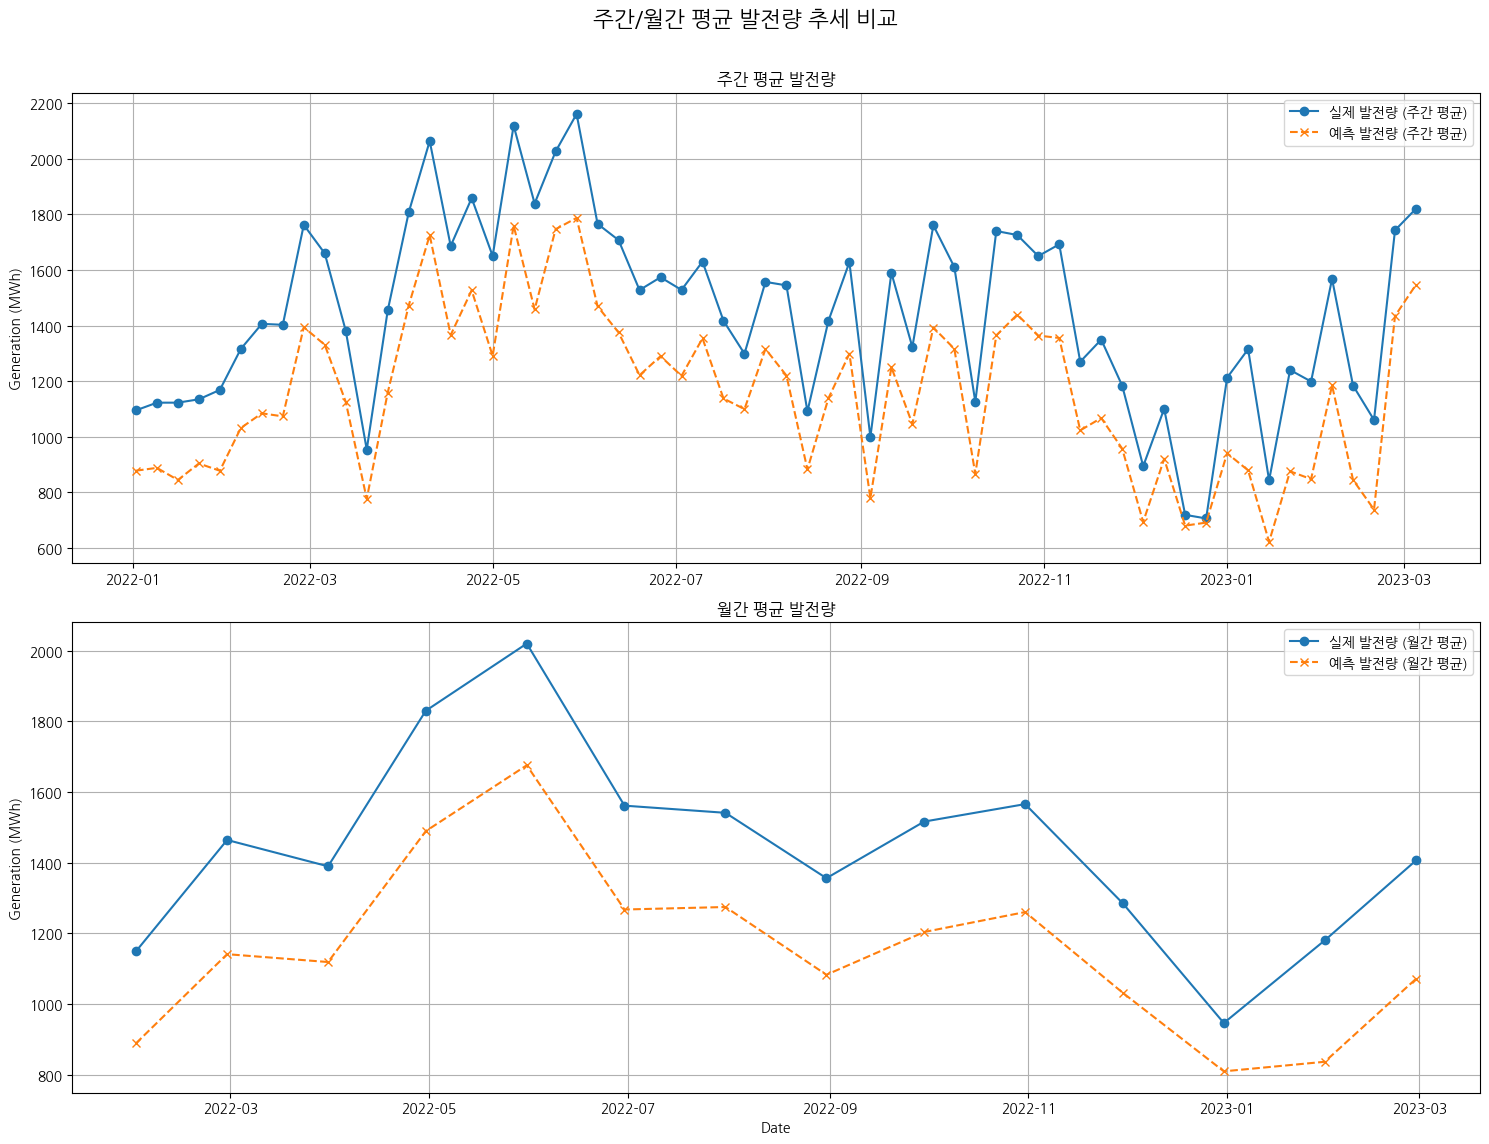

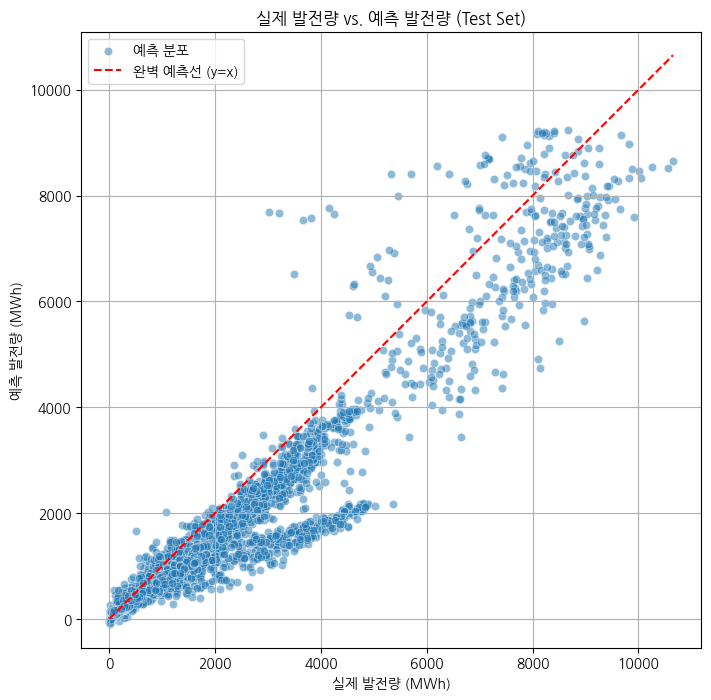

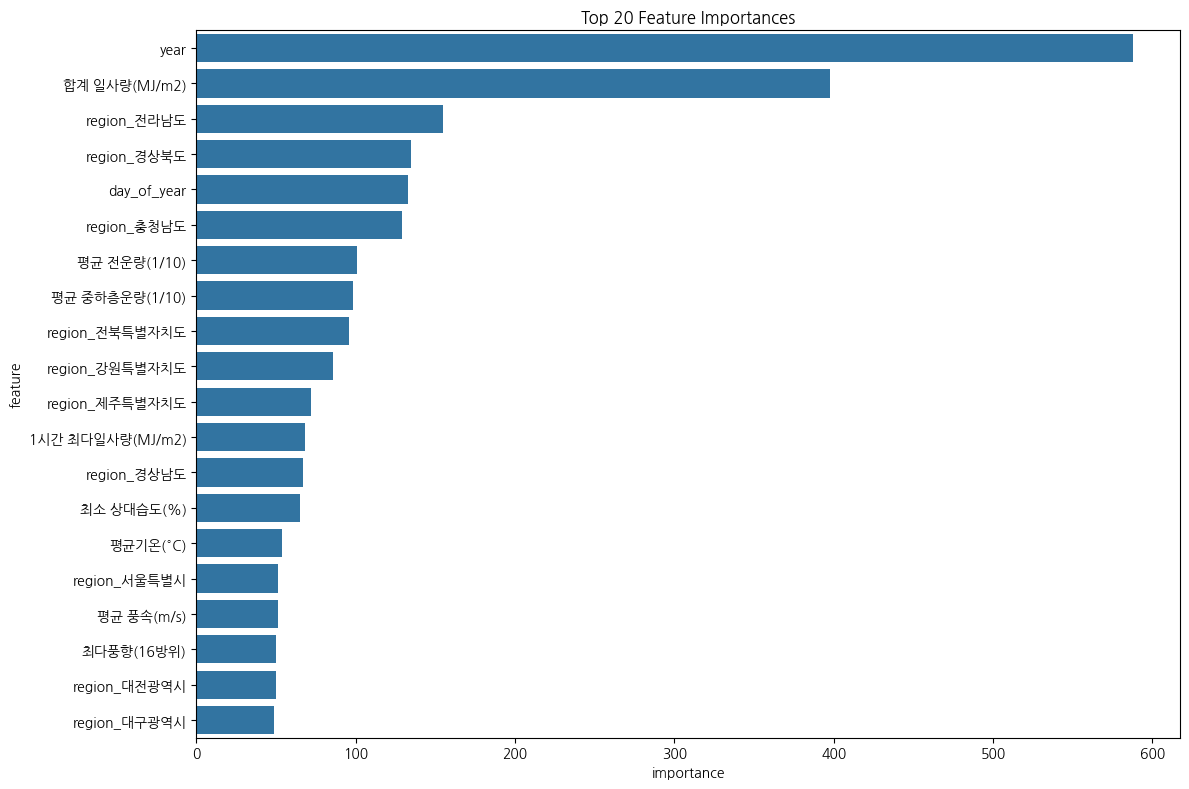

In [4]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 로딩 및 기본 전처리
def load_and_clean_data(file_path):
    """데이터를 로드하고 기본적인 클리닝을 수행하는 함수"""
    df = pd.read_csv(file_path, encoding='cp949')
    df['일시'] = pd.to_datetime(df['일시'])
    
    # 결측치 처리 (forward-fill 후 backward-fill)
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    df[numeric_cols] = df[numeric_cols].fillna(method='ffill').fillna(method='bfill')
    
    return df

# 3. 피처 엔지니어링 함수
def feature_engineer(df):
    """데이터프레임을 입력받아 피처 엔지니어링을 수행하는 함수"""
    df_processed = df.copy()

    # 시간 관련 피처 생성
    df_processed['year'] = df_processed['일시'].dt.year
    df_processed['month'] = df_processed['일시'].dt.month
    df_processed['day'] = df_processed['일시'].dt.day
    df_processed['day_of_week'] = df_processed['일시'].dt.dayofweek
    df_processed['day_of_year'] = df_processed['일시'].dt.dayofyear

    # 주기성 피처 변환 (Sine/Cosine Transformation)
    df_processed['month_sin'] = np.sin(2 * np.pi * df_processed['month'] / 12)
    df_processed['month_cos'] = np.cos(2 * np.pi * df_processed['month'] / 12)
    df_processed['day_of_week_sin'] = np.sin(2 * np.pi * df_processed['day_of_week'] / 7)
    df_processed['day_of_week_cos'] = np.cos(2 * np.pi * df_processed['day_of_week'] / 7)

    # 범주형 피처 원-핫 인코딩
    df_processed = pd.get_dummies(df_processed, columns=['광역자치단체'], prefix='region')

    # 불필요한 컬럼 제거
    cols_to_drop = [col for col in df_processed.columns if '시각(hhmi)' in col]
    cols_to_drop.extend([
        '최저기온(°C)', '최고기온(°C)', '최대 순간 풍속(m/s)', '최대 풍속(m/s)',
        '최대 순간 풍속 풍향(16방위)', '최대 풍속 풍향(16방위)', '풍정합(100m)',
        '평균 증기압(hPa)', '평균 이슬점온도(°C)', '평균 현지기압(hPa)',
        '최고 해면기압(hPa)', '최저 해면기압(hPa)', '합계 대형증발량(mm)',
        '합계 소형증발량(mm)', '위도', '경도', '합계 일조시간(hr)'
    ])
    # 중복 제거 및 원본 시간 컬럼 제거
    cols_to_drop = list(set(cols_to_drop) & set(df_processed.columns))
    df_processed = df_processed.drop(columns=cols_to_drop)
    
    return df_processed

# --- 메인 실행 로직 ---
# 데이터 로드 및 전처리
file_path = os.path.join(generation_folder_path,'merged_weather_and_solar_data.csv')
raw_df = load_and_clean_data(file_path)
processed_df = feature_engineer(raw_df)

# 원본 '일시' 컬럼을 나중 시각화를 위해 보관
dates = processed_df['일시']
processed_df = processed_df.drop(columns=['일시'])

# 4. 데이터 분할 (시계열 기준)
train_df = processed_df[dates < '2022-01-01']
test_df = processed_df[dates >= '2022-01-01']

X_train = train_df.drop('generation_mwh', axis=1)
y_train = train_df['generation_mwh']
X_test = test_df.drop('generation_mwh', axis=1)
y_test = test_df['generation_mwh']

# 훈련 데이터와 테스트 데이터의 컬럼을 일치시킴
train_cols = X_train.columns
test_cols = X_test.columns
shared_cols = list(set(train_cols) & set(test_cols))
X_train = X_train[shared_cols]
X_test = X_test[shared_cols]

# 5. 모델 학습
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = lgbm.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set RMSE: {rmse:.4f}")
print(f"Test Set MAE: {mae:.4f}")
print(f"Test Set R²: {r2:.4f}")

# 7. 시각화 (개선된 버전)

# --- 데이터 준비 ---
# 시각화를 위해 날짜, 실제값, 예측값을 하나의 데이터프레임으로 합칩니다.
results_df = pd.DataFrame({
    'Date': dates[dates >= '2022-01-01'],
    'Actual': y_test.values,
    'Predicted': y_pred
})
results_df.set_index('Date', inplace=True)


# --- 시각화 1: 주간/월간 평균 발전량 추세 ---
# 주간(Weekly) 평균으로 리샘플링
weekly_results = results_df.resample('W').mean()

# 월간(Monthly) 평균으로 리샘플링
monthly_results = results_df.resample('M').mean()

fig, axes = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('주간/월간 평균 발전량 추세 비교', fontsize=16)

# 주간 평균 그래프
axes[0].plot(weekly_results.index, weekly_results['Actual'], label='실제 발전량 (주간 평균)', marker='o', linestyle='-')
axes[0].plot(weekly_results.index, weekly_results['Predicted'], label='예측 발전량 (주간 평균)', marker='x', linestyle='--')
axes[0].set_title('주간 평균 발전량')
axes[0].set_ylabel('Generation (MWh)')
axes[0].legend()
axes[0].grid(True)

# 월간 평균 그래프
axes[1].plot(monthly_results.index, monthly_results['Actual'], label='실제 발전량 (월간 평균)', marker='o', linestyle='-')
axes[1].plot(monthly_results.index, monthly_results['Predicted'], label='예측 발전량 (월간 평균)', marker='x', linestyle='--')
axes[1].set_title('월간 평균 발전량')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Generation (MWh)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # suptitle과 겹치지 않도록 조정
plt.show()


# --- 시각화 2: 실제값 vs 예측값 산점도 ---
plt.figure(figsize=(8, 8))
# 산점도
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.5, label='예측 분포')
# y=x 대각선 (완벽한 예측선)
max_val = max(results_df['Actual'].max(), results_df['Predicted'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='완벽 예측선 (y=x)')

plt.title('실제 발전량 vs. 예측 발전량 (Test Set)')
plt.xlabel('실제 발전량 (MWh)')
plt.ylabel('예측 발전량 (MWh)')
plt.legend()
plt.grid(True)
plt.axis('equal') # X, Y축 스케일을 동일하게 설정
plt.show()


# --- 시각화 3: 피처 중요도 (기존 코드와 동일) ---
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': lgbm.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()